# Simulations on phase matching in High Harmonic Generation - ELISS 2024, 2024-09-05, Thursday, 16:00

## Abstract/description

The participants of this practice will learn the basic principles of phase matching (PM) in high-harmonic generation (HHG) in gases. In course of this theoretical lesson we will build a simple model than can be used to study PM, and allows one to optimize generation conditions. As a final goal, we will go through main steps on how to design an HHG beamline with specific technical constraints and availabilities in order to obtain a source theoretically optimized for a specific purpose.  

# High Harmonic Generation (HHG) in absorbing gases

The generated signal in a static medium of length L is
the coherent sum over all single atom emitters and can be
written as [1]:
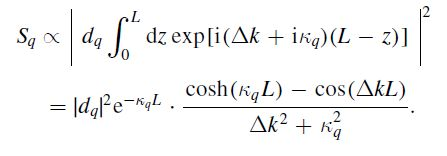

where Δk is phase mismatch and κ is absorption.

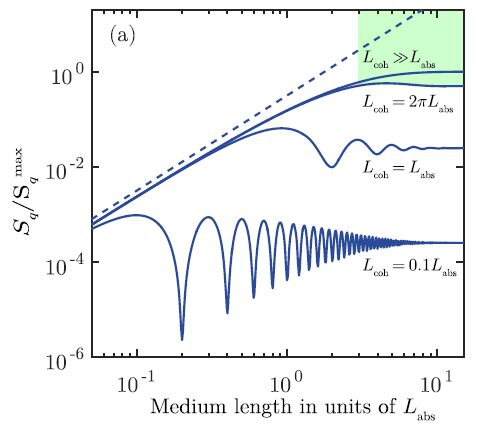

The green are shows the region of maximal achievable absoprtion-limited flux, for which some conditions are equired to be fulfilled. (see later)

Phase mismatch has four main components in case of HHG in gases:

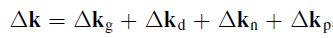

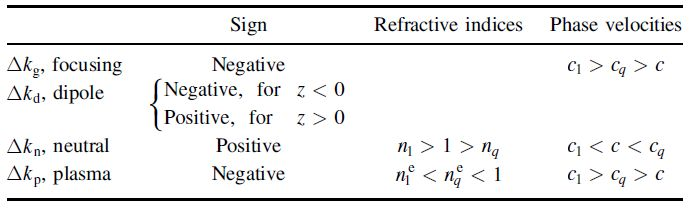

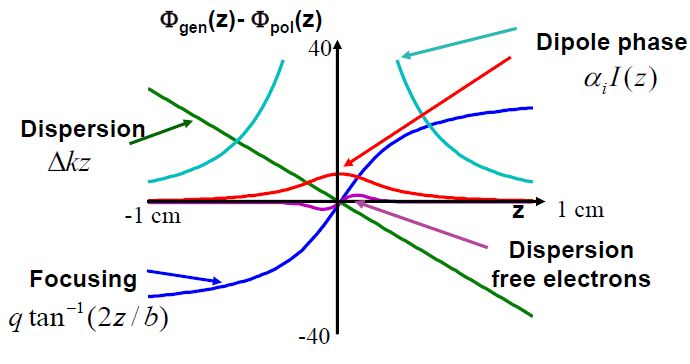

In the following we will calculate in a simple case these phase mismatch components along with absorption.

Instead of phase mismtach and absorption, often reciprocal quantitites are used because they are more representative (having length units) [3]:

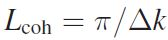

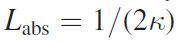

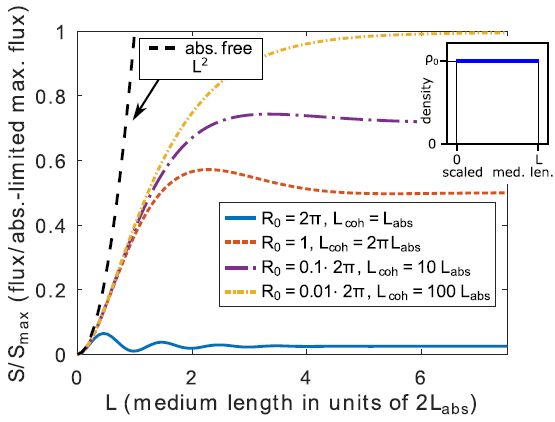

Based on this figure the conditions the maximum flux is achieved if [3,4]:

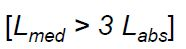


**IMPORTANT NOTE**: Do not forget that phase mismatch has a sign, so summing up coherence length is not meaningful. Always calculate coherence length based on total phase mismatch. In the following, when showing coherence length from one single phase mismatch term is only for didactical pruposes!

## Phase mismatch terms

## Dipole phase

First take the dipole phase term:

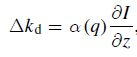

which only slightly depends on harmonic order through α. And α only slightly depends on harmonic order [2] in most common HHG ranges (20-70 eV).

<ipython-input-66-54630dbd8e62>:38: RuntimeWarning: divide by zero encountered in divide
  Lcoh_d = np.pi/dkds/1e6


Text(0.5, 1.0, 'Dipole phase mismatch as a function of position')

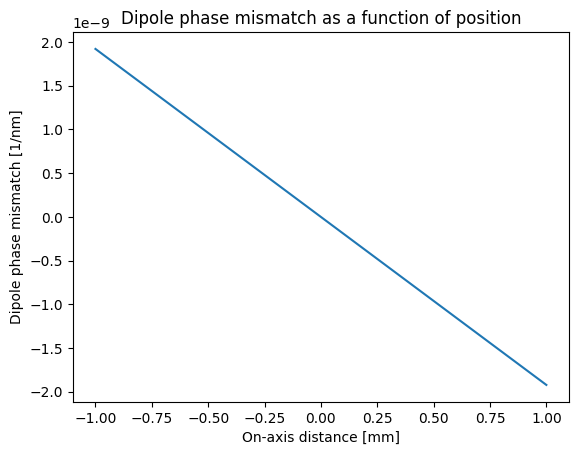

In [66]:
import numpy as np
from matplotlib import pyplot as plt

# Give Rayleigh length of focused beam in [mm]
LR = 263.273

# Give peak intensity in [x10^14 W/cm^2]
I0 = 3.33

# Give spatial range in [mm] around focus (z = 0 is focal plane)
zmin = -1.0
zmax = 1.0

# Give number of points in z
numz = 101

# Generate z coordinates [mm]
zs = np.linspace(zmin, zmax, numz)

# Calculate deriv_z(1/(1+(x/L)^2) =  -2*L^2*z/(L^2+z^2)^2) in [1/mm]
# Based on intensity variation along z of Gausian beam on wikipedia
# https://www.wolframalpha.com/input?i=deriv+1%2F%281%2B%28x%2FL%29%5E2%29
deriv_I = (-I0*2*(np.power(LR,2))*zs)/(np.power((np.power(LR,2) + np.power(zs,2)),2))

# Alpha value in [x10^(-14) cm^2/W]
# Mette B. Gaarde and Kenneth J. Schafer
# Phys. Rev. A 65, 031406(R) – Published 1 March 2002
# https://doi.org/10.1103/PhysRevA.65.031406
alpha = 20

# Calculate phase mismatch caused by dipole in [1/nm]
# using
# Heyl, PhD thesis, https://lup.lub.lu.se/search/files/3028441/4937902.pdf
# Eq. (2.41)
dkds = alpha * deriv_I /1e6

# Calculate corresponding coherence length in [mm]
Lcoh_d = np.abs(np.pi/dkds/1e6)

# Plot
fig1 = plt.figure()
plt.plot(zs, dkds)
plt.xlabel('On-axis distance [mm]')
plt.ylabel('Dipole phase mismatch [1/nm]')
plt.title('Dipole phase mismatch as a function of position')

Related coherence length

Text(0.5, 1.0, 'Coherence length related to dipole phase mismatch as a function of position')

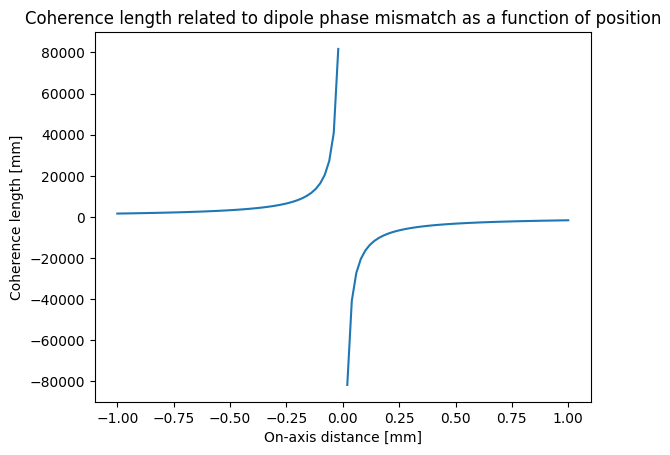

In [67]:
# Plot
fig1_2 = plt.figure()
plt.plot(zs, Lcoh_d)
plt.xlabel('On-axis distance [mm]')
plt.ylabel('Coherence length [mm]')
plt.title('Coherence length related to dipole phase mismatch as a function of position')

## Geomteric phase (focusing)

The phase dependence due to focusing can be approximated

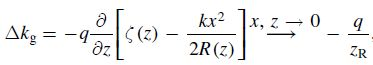

Text(0.5, 1.0, 'Coherence length related to geomteric phase mismatch as a function of position')

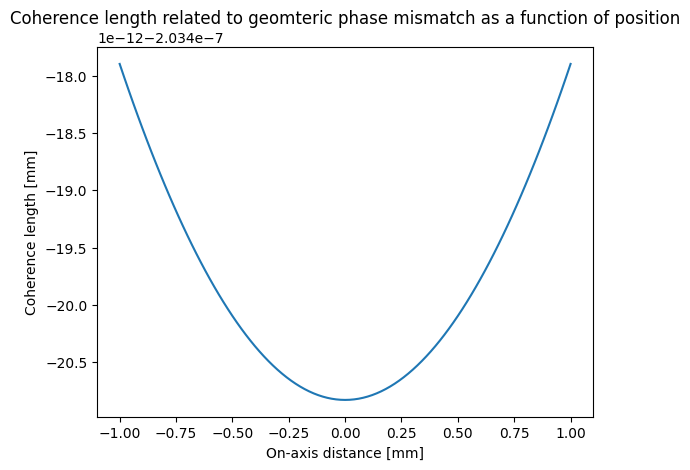

In [68]:
# Give central wavelength of laser in [nm], [mm], [um]
wvlc_nm = 830
wvlc_mm = wvlc_nm/1e6
wvlc_um = wvlc_nm/1e3

# Corresponding photon energy for central wavelength in [eV]
eVc = np.pi*3.946539576e-4/wvlc_mm

# Give photon energy in [eV]
eVsel = 80

# Corresponding harmonic order
qsel = eVsel / eVc

# Calculate deriv_z(atan(z/L) =  L/(L^2 + z^2)) in [1/mm]
deriv_phi = LR/(np.power(LR,2) + np.power(zs,2))

# Calculate phase mismatch in [1/nm]
# according to:
# Heyl, PhD thesis, https://lup.lub.lu.se/search/files/3028441/4937902.pdf
# Eq. (2.40)
dkgs = -qsel*deriv_phi/1e6

# In focal plane approximation
# according to same expression right hand side
dkg_infoc = -qsel/LR/1e6

# Calculate corresponding coherence length in [mm]
Lcoh_g = np.abs(np.pi/dkgs/1e6)

# Plot
fig2 = plt.figure()
plt.plot(zs, dkgs)
plt.xlabel('On-axis distance [mm]')
plt.ylabel('Geometric phase mismatch [1/nm] ')
plt.title('Geomteric phase mismatch as a function of position')

Related coherence length

Text(0.5, 1.0, 'Coherence length related to geomteric phase mismatch as a function of position')

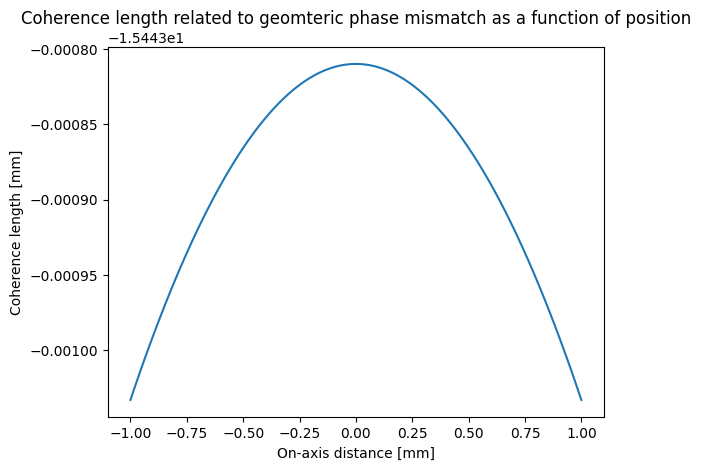

In [70]:
# Plot
fig2_2 = plt.figure()
plt.plot(zs, Lcoh_g)
plt.xlabel('On-axis distance [mm]')
plt.ylabel('Coherence length [mm]')
plt.title('Coherence length related to geomteric phase mismatch as a function of position')

Geometric phase mismatch has a stronger dependence on harmonic order (linear). Let's calculate it as a function of photon energy:

Text(0.5, 1.0, 'Geomteric phase mismatch as a function of photon energy')

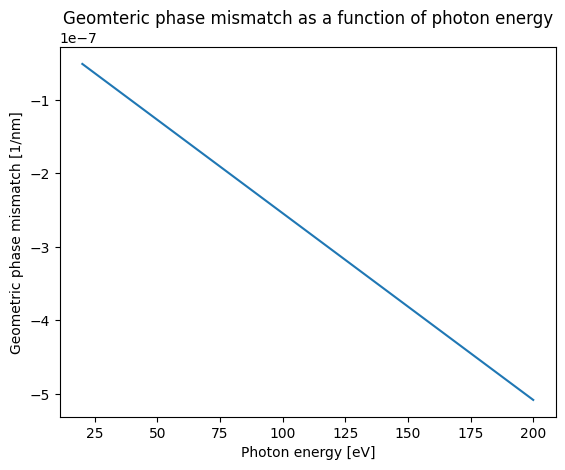

In [29]:
# Calculate in focal plane phase mismatch as a function of photon energy
# Set photon energy range in [eV]
eVmin = 20
eVmax = 200
numeV = 301
eVs = np.linspace(eVmin, eVmax, numeV)
# Corresponding harmonic orders
qs = eVs/eVc
dkgs_eV = -qs/LR/1e6

# Plot
fig3 = plt.figure()
plt.plot(eVs, dkgs_eV)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Geometric phase mismatch [1/nm]')
plt.title('Geomteric phase mismatch as a function of photon energy')

Related coherence length

## Neutral dispersion related phase

The phase mismach related to the geometrical phase can be calculated as

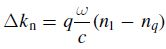

where n are refractive indeces at fundamental and harmonic order q frequencies.

Text(0.5, 1.0, 'Scatering form factor')

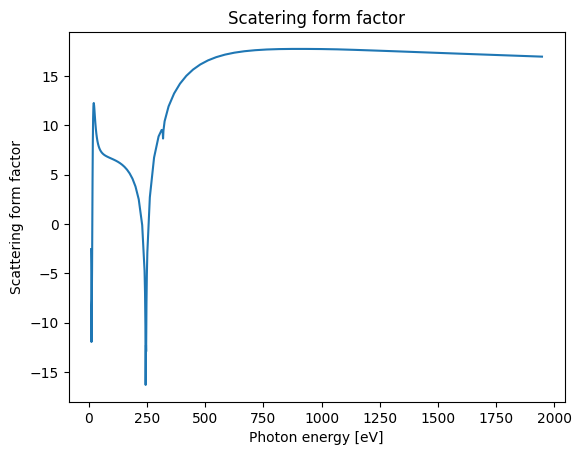

In [52]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Calculate refractive index and phase mismatch factor gamma_n for a range
# of photon energies
#
# The calculation is based on Heyl PhD thesis, eq. (2.42):
# delta k_n = k_q * (n_l - n_q)
# gamma_n = delta k_n / rho
# where:
# - k_q is the wave vector of harmonic q in vacuum
# - n_l is the refractive index at the fundamental wavelength
# - n_q is the refractive index at harmonic q
# - rho is the number density of atoms
#
# The formula of (n_q-1) is based on the refractive index definition of
# B.L. Henke, E.M. Gullikson and J.C. Davis.
# Atomic Data and Nuclear Data Tables 54, 181 (1993); eq. (2)
# - (n_q - 1)/rho = r_e *2*pi*f_1/k_q^2 is the real part of the refind.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# ==================
# parameters to set
# ==================
# Temperature in [Kelvin]
temp = 273
# Read f1f2 file - scattering form factors to calculate refractive index in XUV
# range, see later
# source https://physics.nist.gov/PhysRefData/FFast/html/form.html
Mf1f2 = np.loadtxt('/content/sample_data/arf1f2_nist.dat', delimiter = ',', skiprows=1)


# Refractive index coefficients for Ar
# Source, refractiveindex.info, Bideu-Mehu
A1 = 2.50141e-3
A2 = 5.00283e-4
A3 = 5.22343e-2
B1 = 91.012
B2 = 87.892
B3 = 214.02

# Conversion factors
# % 1 [nm] in [a.u.]
nm2au = 1/5.29177210903e-2
# % from [eV] to wave vector in [1/nm]
eV2wvec1onm=2/3.946539576e2

# Some constants
# % classical electron radius in [nm]
rce = 2.8179403227e-6
# % classical electron radius in [a.u.]
rceau = rce * nm2au
# % Speed of light in vacuum in [nm/fs]
vlight = 299.792458


# Number densities
# % atmospheric number density of atoms in [1/nm^3]
rhoatm = 7.3389/temp
# % number density of atoms in [1/nm^3] at 1 mbar
rho1mbar = rhoatm/1e3
# % number dens. of atoms in [1/(a.u.)^3], 1 mbar
rhoau1mbar = rho1mbar/np.power(nm2au,3);

# Calculate nl-1 at the given wavelength
nlm1 = A1/(B1-1.0/wvlc_um/wvlc_um)
nlm1 = nlm1 + A2/(B2-1.0/wvlc_um/wvlc_um)
nlm1 = nlm1 + A3/(B3-1.0/wvlc_um/wvlc_um)


# Extract electronvolts and f1-f2 form factors
eVs_f1f2 = Mf1f2[:,0]
f2s = Mf1f2[:,2]
f1s = Mf1f2[:,1]

# Plot form factors
fig4 = plt.figure()
plt.plot(eVs_f1f2, f1s)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Scattering form factor f1')
plt.title('Scatering form factor f1 related to real refractive index')

Caculate phase mismatch and coherence length

Text(0.5, 1.0, 'Neutral phase mismatch, at p = 150 mbar')

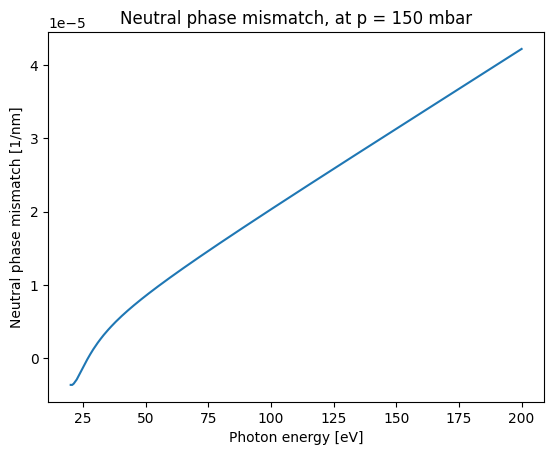

In [57]:
# Calculate wave vector of photon energies [1/nm]
wvecs = eV2wvec1onm*eVs

# interpolate form factors at the specififed photon energies
f1s_eVs = np.interp(eVs, eVs_f1f2, f1s)

# Calculate (n_q-1)/rho in [nm^3]
nqm1prho = 2*np.pi*rce*f1s_eVs/wvecs/wvecs

# Calculate (n_l-1)/rho in [nm^3]
nlm1prho = nlm1/rhoatm

# Calculate gamma_n = k_q * ((n_l-1)/rho - (n_q-1)/rho) in [nm^2]
# see Ref. [3]
gamma_n = wvecs * (nlm1prho - nqm1prho)


# The selected pressure in [mbar]
psel = 150

# Number densities
#  % atmospheric number density of atoms in [1/nm^3]
rhoatm = 7.3389/temp
#% number density of atoms in [1/nm^3] at 1 mbar
rho1mbar = rhoatm/1e3
# % The corresponding number density in [1/nm^3]
rho_1pnm3 =  rho1mbar * psel

# Calculate neutral induced phase mismatch in [1/nm]
dkns = gamma_n * rho_1pnm3

# Calculate corresponding coherence length in [mm]
Lcoh_n = np.pi/dkns/1e6

# Plot phase mismatch
fig5 = plt.figure()
plt.plot(eVs, dkns)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Neutral phase mismatch [1/nm]')
plt.title('Neutral phase mismatch, at p = ' + str(psel) + ' mbar')

Text(0.5, 1.0, 'Coherence length related to neutral phase mismatch, at p = 150 mbar')

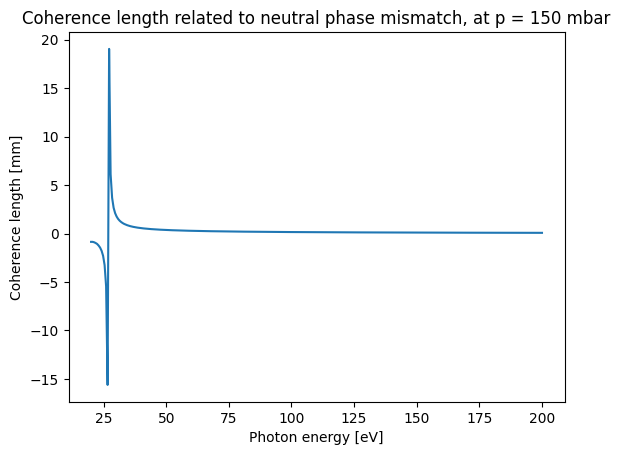

In [63]:
# Plot coherence length
fig6 = plt.figure()
plt.plot(eVs, Lcoh_n)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Coherence length [mm]')
plt.title('Coherence length related to neutral phase mismatch, at p = ' + str(psel) + ' mbar')

## Plasma dispersion related phase

The plasma dispersion related phase mismatch can be calculated as

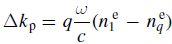

Where n are refractive indeces related to free electrons.

Text(0.5, 1.0, 'Plasma phase mismatch, at p = 150 mbar')

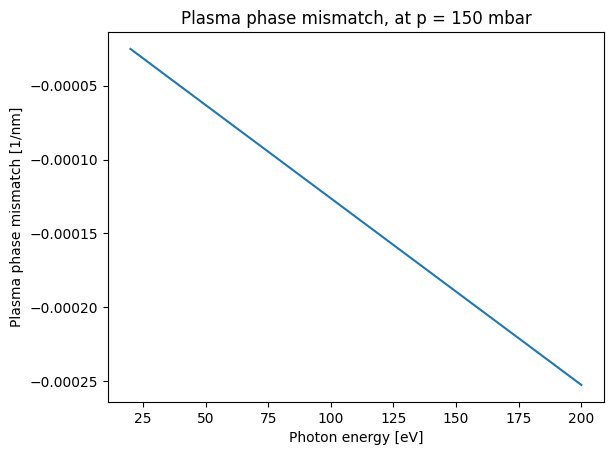

In [62]:
# Calculate angular frequencies for photon energies in [Rad/fs]
omegas_q = vlight * wvecs

# Laser angular frequency in  [Rad/fs]
omega_l = 2*np.pi*vlight/wvlc_nm

# Laser frequency in [PHz]
mu_l = omega_l/2/np.pi

# Ionization ratio can be set according to idea
ionrat = 0.1
ionrat_string = str(ionrat);

# factor e^2/varepsilon_0/m_e in [nm^3/fs^2]
# - e: elementary charge
# - varpesilon_0: vacuum permittivity
# - m_e: electron rest mass
factor = 1.60217662*1.60217662/8.8541878128/9.10938356*1e2

# Calculate gamma_p in [nm^2]
# see Ref. [3]
gamma_p = - wvecs*factor*ionrat*(1/np.power(omega_l,2)-1/np.power(omegas_q,2));

# Calculate plasma induced phase mismatch in [1/nm]
dkps = gamma_p * rho_1pnm3

# Calculate corresponding coherence length in [mm]
Lcoh_p = np.abs(np.pi/dkps/1e6)

# Plot phase mismatch
fig7 = plt.figure()
plt.plot(eVs, dkps)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Plasma phase mismatch [1/nm]')
plt.title('Plasma phase mismatch, at p = ' + str(psel) + ' mbar')

Caculate related coherence length

Text(0.5, 1.0, 'Coherence length related to plasma phase mismatch, at p = 150 mbar')

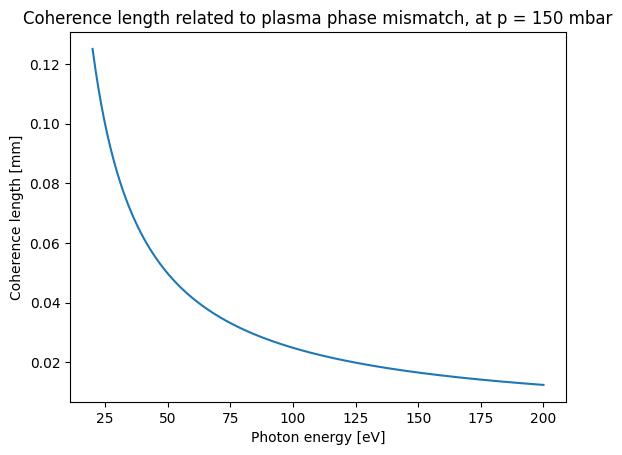

In [64]:
# Plot coherence length
fig8 = plt.figure()
plt.plot(eVs, Lcoh_p)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Coherence length [mm]')
plt.title('Coherence length related to plasma phase mismatch, at p = ' + str(psel) + ' mbar')

## Conclusions related to phase mismatch

Most often the dominance order of phase mismatch terms

**plasma > neutral > geomterical > dipole**


As a result, the key often is to tune conditions in a way that plasma and neutral (plus often geometrical) phase mismatch terms cancel each other (see signs in table above). This can be done using the so-called **pressure-tuned phase matching** region according to the equation:

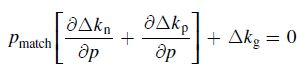

## Absorption

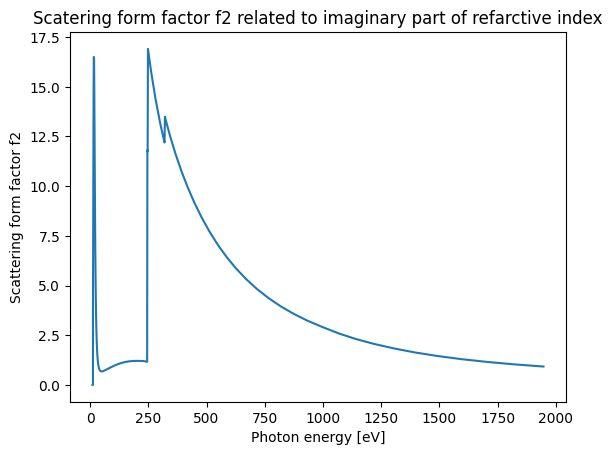

In [73]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Calculate absorption length according to formula:
# L_abs = 1/ (2*f_2 * rho * lambda_q * r_e)
# with:
# - f_2: atominc form factor, imaginary part
# - rho: atom number density
# - lambda_q: wavelength correspinding to given photon energy
# - r_e: classical electro radius
#
# Also give absorption length as a function of photon energy for at a certain
# pressure (psel in [mbar]). The photon energy range is fixed to available
# f_2 data and only the plot range is cahnged durin plotting
#
# The absorption formula is based on the refractive index definition of
# B.L. Henke, E.M. Gullikson and J.C. Davis.
# Atomic Data and Nuclear Data Tables 54, 181 (1993); eq. (2)
# and the relation L_abs = 1/(2*k*n_i)
# where:
# - k = 2*pi/lambda_q is the wave vactor of radiation in vacuum with wavelength
# lambda_q
# - n_i = r_e * lambda_q^2*rho*f_2/(2*pi) is imaginary part of the ref. index
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# interpolate form factors f2 at the specififed photon energies
f2s_eVs = np.interp(eVs, eVs_f1f2, f2s)

# Plot form factors
fig9 = plt.figure()
plt.plot(eVs_f1f2, f2s)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Scattering form factor f2')
plt.title('Scattering form factor f2 related to imaginary part of refractive index')



Text(0.5, 1.0, 'Absoprtion (kappa) at p = 150 mbar')

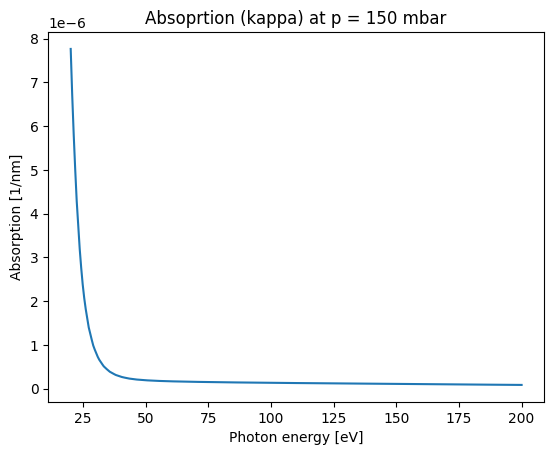

In [76]:
# Calculate photoionization cross sections in [nm^2] and [Mbarn]
sigmas_nm2 = 2.0*rce/wvecs*2*np.pi*f2s_eVs
sigmas_Mbarn = 2.0*rce/wvecs*2*np.pi*f2s_eVs*1e4

# % the number density in [1/nm^3] for sleected pressure
rhosel = psel*rho1mbar

# Absorption kappa in [1/nm]
kappas = sigmas_nm2*rhosel*0.5
# Corresponding absorption lengths in [mm]
Labs_kappas_mm = 0.5/kappas/1e6

# Plot absorption kappa
fig10 = plt.figure()
plt.plot(eVs, kappas)
plt.xlabel('Photon energy [eV]')
plt.ylabel('Absorption [1/nm]')
plt.title('Absoprtion (kappa) at p = ' + str(psel) + ' mbar')

Absortpion length

Text(0.5, 1.0, 'Absoprtion length at p = 150 mbar')

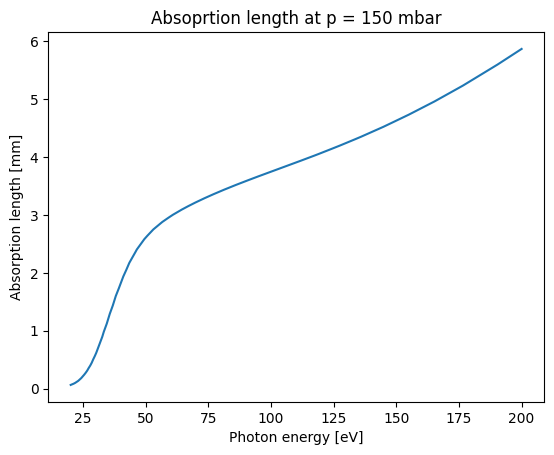

In [77]:
# Plot absorption length
fig11 = plt.figure()
plt.plot(eVs, Labs_kappas_mm )
plt.xlabel('Photon energy [eV]')
plt.ylabel('Absorption length [mm]')
plt.title('Absoprtion length at p = ' + str(psel) + ' mbar')

## Optimal parameters from phase matching model - how to design a beamline based on this model

For a given pulse with duration
τ and energy E l the optimal macroscopic parameters for a
gas cell in the focus can be calculated as follows:

1.   Chose the gas type: gives the critical ionization rate (Ar :~4%, Ne: ~1%) (see Ref [1])

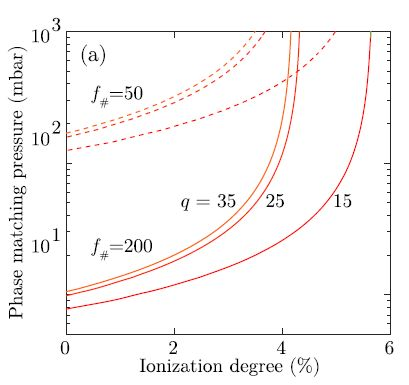

2.   Calculate the peak intensity (I_peak) that produces a reasonable ionization rate  (not part of this lecture)


3. Calculate the beam waist (w_0) : gives Rayleigh range

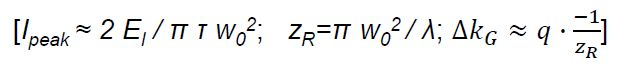

4. Calculate phase matching pressure for a plateau harmonic:

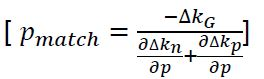


5. Calculate minimal cell length taking into account absorption length and Rayleigh length

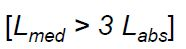


6. Calculate the focusing geometry taking into account practical considerations like
available space, damage threshold for mirrors, nonlinearities during propagation
in air or through lens and entrance window.





# References


1.   Heyl C M, Arnold C L, Couairon A and L’Huillier A 2016 J. Phys. B: At. Mol. Opt. Phys. 50 013001 https://doi.org/10.1088/1361-6455/50/1/013001
2.   Mette B. Gaarde and Kenneth J. Schafer,  Phys. Rev. A 65, 031406(R) 2002 https://doi.org/10.1103/PhysRevA.65.031406
3. Balázs Major and Katalin Varjú 2021 J. Phys. B: At. Mol. Opt. Phys. 54 224002 https://doi.org/10.1088/1361-6455/ac3fbe
4. Constant E, Garzella D, Breger P,M´evel E, Dorrer C, Le Blanc
C, Salin F and Agostini P 1999 Phys. Rev. Lett. 82 1668–71 https://doi.org/10.1103/PhysRevLett.82.1668